# Machine Learning Basics with Scikit-learn: Day 4

## Data pre-processing

One of the main tasks in machine learning is pre-processing the data. This means transforming the raw data in an efficient format. Some common issues that raw data have are:
* Presence of outliers
* Missing data
* Data with different scales
* Data without a normal distribution
* Redundant features
* Noisy features
* Data operationalization

The major steps in data pre-processing are:
1. **Data Cleaning**: Data can have many irrelevant and missing parts. To handle this part, data cleaning is done. It involves handling of missing data, noisy data etc. 
2. **Data Transformation**: Data and features' scales need to be changed in appropiate forms that respect the statistical principles. 
3. **Data Reduction**: Reducing the number of features and observations can increase the storage efficiency and reduce data storage and analysis costs. Also, prevent bias issues. 

The `sklearn` library provides several utility functions and transformer classes to change raw data into a representation that is more suitable for the downstream estimators.

Today, we will review three main practices that are core in data-preprocessing:
* Data standarization and normalization
* Feature selection
* Imputing data 

Let's start loading the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

## Datasets

For today's session, we will use the Boston houses' prices for demo purposes. You will use the California dataset for the exercises:

<table>
    <tr>
        <td style="text-align:center; width:50%">
            <h3>Boston house prices dataset</h3>
            <img src="https://www.bostonmagazine.com/wp-content/uploads/sites/2/2020/03/back-bay-brownstone.jpg" width="400px">
            <ul class="simple">
                <li><p>CRIM     per capita crime rate by town</p></li>
                <li><p>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</p></li>
                <li><p>INDUS    proportion of non-retail business acres per town</p></li>
                <li><p>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</p></li>
                <li><p>NOX      nitric oxides concentration (parts per 10 million)</p></li>
                <li><p>RM       average number of rooms per dwelling</p></li>
                <li><p>AGE      proportion of owner-occupied units built prior to 1940</p></li>
                <li><p>DIS      weighted distances to five Boston employment centres</p></li>
                <li><p>RAD      index of accessibility to radial highways</p></li>
                <li><p>TAX      full-value property-tax rate per \$10,000</p></li>
                <li><p>PTRATIO  pupil-teacher ratio by town</p></li>
                <li><p>B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town</p></li>
                <li><p>LSTAT    \% lower status of the population</p></li>
                <li><p>MEDV     Median value of owner-occupied homes in $1000’s</p></li>
            </ul>
        </td>
        <td style="text-align:center">
            <h3>California dataset </h3>
            <img src="https://cdn.vox-cdn.com/thumbor/xIC4EBWBo2QPsmB__soEniUe2ZU=/0x0:8736x5824/1820x1213/filters:focal(3670x2214:5066x3610):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/56696503/shutterstock_154454792.0.0.jpeg" width="400px">
            <p>This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).</p>
            <ul class="simple">
                <li>MedInc median income in block</li>
                <li>HouseAge median house age in block</li>
                <li>AveRooms average number of rooms</li>
                <li>AveBedrms average number of bedrooms</li>
                <li>Population block population</li>
                <li>AveOccup average house occupancy</li>
                <li>Latitude house block latitude</li>
                <li>Longitude house block longitude</li>
            </ul>
        </td>
    </tr>
</table>

### Loading the Boston dataset

In [2]:
boston_dataset = load_boston()

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston_df['PRICE'] = boston_dataset['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Exercise 1
Load the California dataset and create a DataFreme. This dataset contains 20,640 samples and 9 features.

Remember that the scikit-learn raw datasets come with the following objects:
* `data`
* `target`
* `feature_names`

In [4]:
# Load the data from scikit-learn
california_dataset = fetch_california_housing()

In [5]:
# Create the dataframe
california_df = pd.DataFrame(california_dataset.data, columns = california_dataset.feature_names)
california_df['MedInc'] = california_dataset['target']
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.781,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## Data descriptive analysis
The first step is usually comprehend and analyze the data. This can be done by checking their descriptive statistics, distributions, and correlations.

We run the command `describe` to see the statistical information of this dataset: count, mean, standard deviation, minimum value, quartiles, and maximum value.

In [6]:
round(boston_df.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


We can also see each feature's distribtuion visually by calculating its **histogram.** This plot shows how many observations with a specific value `x` are present in the dataset. In statistical analysis, data should follow a normal distribution to be appropiaterly analyzed. 

Let's start checking the Boston dataset distribution. We will check first how the target (i.e., PRICE) is distributed.

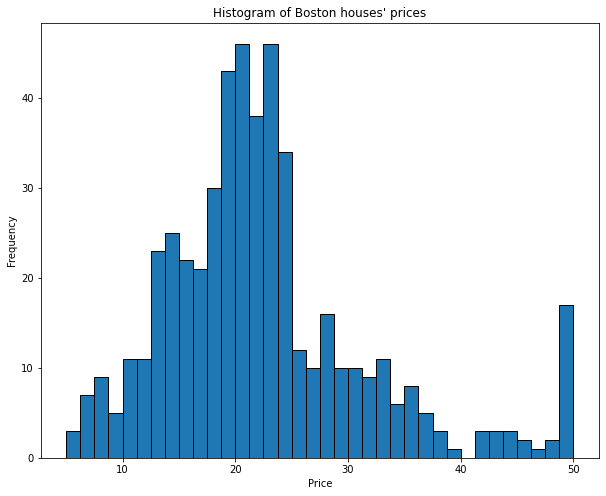

In [7]:
fig = plt.figure(figsize=(10,8))
plt.hist(boston_df['PRICE'], edgecolor = 'black', bins = int(180/5))
plt.title("Histogram of Boston houses' prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Now, let's see how the other variables are distributed

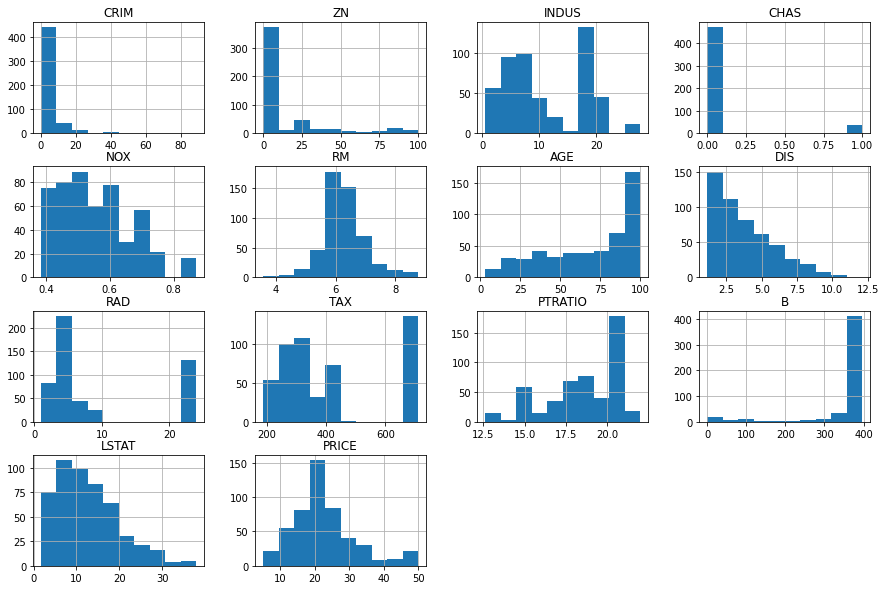

In [8]:
boston_df.hist(figsize=(15,10))
plt.show()

Finally, we will check the correlations among the variables

In [9]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Excerise 2
Check the descriptive statistics and distributions of the California dataset

In [10]:
# Calculate the descriptives
round(california_df.describe(),2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,2.07,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.15,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.15,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,1.20,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,1.80,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,2.65,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,5.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


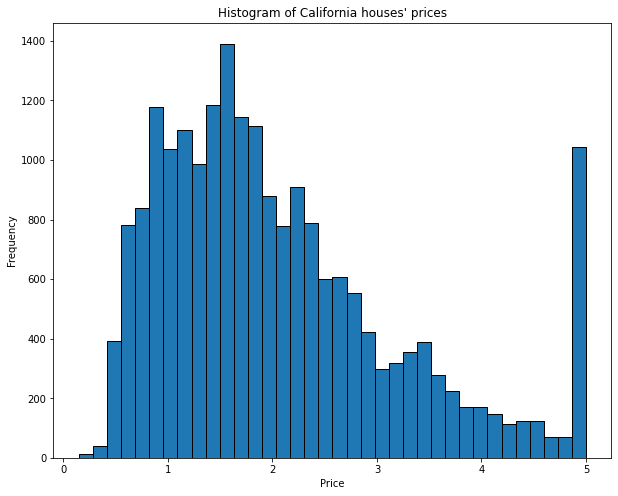

In [11]:
# Plot the distribution of the target value ('MedInc')
fig = plt.figure(figsize=(10,8))
plt.hist(california_df['MedInc'], edgecolor = 'black', bins = int(180/5))
plt.title("Histogram of California houses' prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

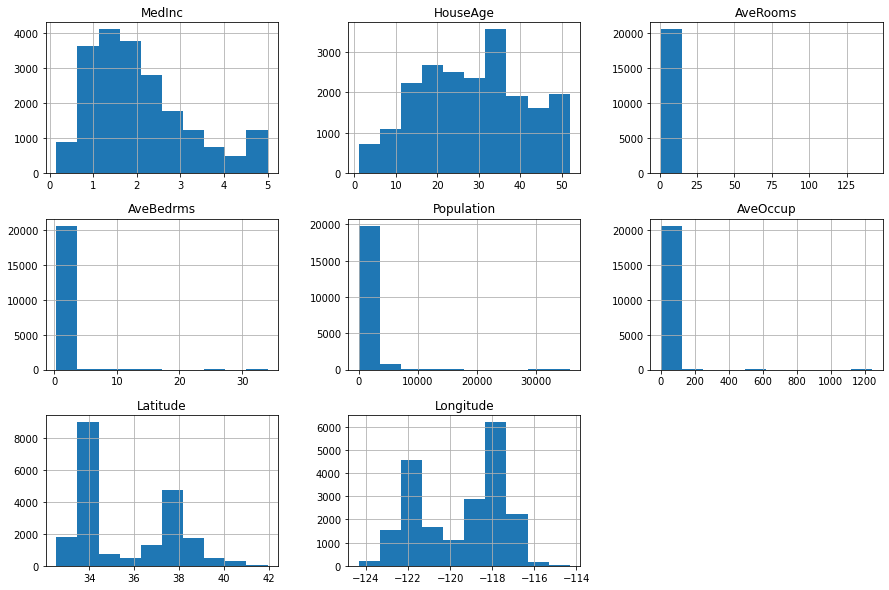

In [12]:
# Plot the distribution of all features
california_df.hist(figsize=(15,10))
plt.show()

In [13]:
# Calculate the correlations
california_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967
HouseAge,0.105623,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.151948,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.046701,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,-0.024650,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,-0.023737,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.144160,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.045967,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


## Standarization: Z-score

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. 

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn. They might behave badly if the individual features do not more or less look like standard normally distributed data: **zero mean and unit variance**.

In practice, we often ignore the shape of the distribution and just **transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation**.

<img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/355397047/en/z_score.svg" role="img" data-atf="0" data-frt="0">

where *Z* is the standard score, *x* is the observed value, *u* is the mean of the sample, and is *s* the standard deviation of the sample. 

For instance, many elements used in the objective function of a learning algorithm assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The preprocessing module provides the **StandardScaler** utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

In [14]:
# Load the scaler
scaler = preprocessing.StandardScaler()

In [15]:
# Fit and transform the data
boston_df_scaled = scaler.fit_transform(boston_df)

In [16]:
# Convert the data into a pandas Dataframe
boston_df_scaled = pd.DataFrame(boston_df_scaled, columns = boston_df.columns)

In [17]:
# Get the descriptives. We round the results to 2 decimals. 
round(boston_df_scaled.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.49,-1.56,-0.27,-1.47,-3.88,-2.34,-1.27,-0.98,-1.31,-2.71,-3.91,-1.53,-1.91
25%,-0.41,-0.49,-0.87,-0.27,-0.91,-0.57,-0.84,-0.81,-0.64,-0.77,-0.49,0.21,-0.80,-0.60
50%,-0.39,-0.49,-0.21,-0.27,-0.14,-0.11,0.32,-0.28,-0.52,-0.46,0.27,0.38,-0.18,-0.15
75%,0.01,0.05,1.02,-0.27,0.60,0.48,0.91,0.66,1.66,1.53,0.81,0.43,0.60,0.27
max,9.93,3.80,2.42,3.67,2.73,3.56,1.12,3.96,1.66,1.80,1.64,0.44,3.55,2.99


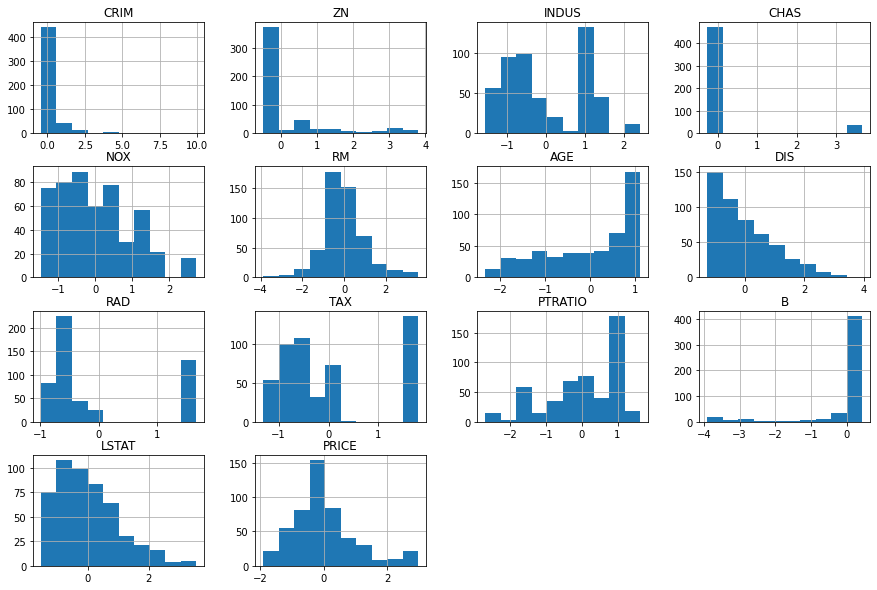

In [18]:
# We plot the features' distribution.
boston_df_scaled.hist(figsize=(15,10))
plt.show()

### Exercise 3:
Use the `StandardScaler` to transform the California dataset. Then check that the means are equal to zero and standard deviation are equal to 1. 

In [19]:
# Load the scaler
scaler = preprocessing.StandardScaler()

In [20]:
# Fit and transform the data
california_df_scaled = scaler.fit_transform(california_df)

In [21]:
# Convert the data into a pandas Dataframe
california_df_scaled = pd.DataFrame(california_df_scaled, columns = california_df.columns)

In [22]:
# Get the descriptives. We round the results to 2 decimals. 
round(california_df_scaled.describe(),2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.66,-2.20,-1.85,-1.61,-1.26,-0.23,-1.45,-2.39
25%,-0.76,-0.85,-0.40,-0.19,-0.56,-0.06,-0.80,-1.11
50%,-0.24,0.03,-0.08,-0.10,-0.23,-0.02,-0.64,0.54
75%,0.50,0.66,0.25,0.01,0.26,0.02,0.97,0.78
max,2.54,1.86,55.16,69.57,30.25,119.42,2.96,2.63


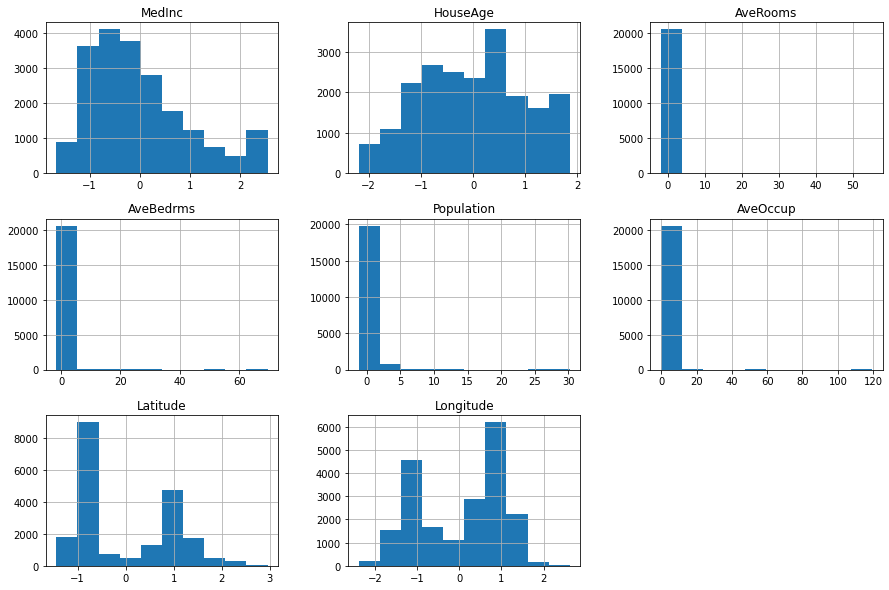

In [23]:
# We plot the features' distribution.
california_df_scaled.hist(figsize=(15,10))
plt.show()

### Summary
* Z-score normalization handles outlier well but does not produce normalized data with the exact same scale.
* This method rescales data to have a mean equal to 0 and a standar deviation of 1. 

<img class="img-responsive img-thumbnail" src="https://www.simplypsychology.org/standardizing.svg" alt="Standard Normal Distribution (SND)">

## Min-max normalization: Scaling features to a range
An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using *MinMaxScaler* or *MaxAbsScaler*, respectively.

The formula is:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0222c9472478eec2857b8bcbfa4148ece4a11b84">

Here is an example to scale a toy data matrix to the [0, 1] range:

In [24]:
# Load the scaler
min_max_scaler = preprocessing.MinMaxScaler()

In [25]:
# Fit and transform the data
boston_df_scaled_minmax = min_max_scaler.fit_transform(boston_df)

In [26]:
# Convert the data into a pandas Dataframe
boston_df_scaled_minmax = pd.DataFrame(boston_df_scaled_minmax, columns = boston_df.columns)

In [27]:
# Get the descriptives. We round the results to 2 decimals. 
round(boston_df_scaled_minmax.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.04,0.11,0.39,0.07,0.35,0.52,0.68,0.24,0.37,0.42,0.62,0.90,0.30,0.39
std,0.10,0.23,0.25,0.25,0.24,0.13,0.29,0.19,0.38,0.32,0.23,0.23,0.20,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.43,0.09,0.13,0.18,0.51,0.95,0.14,0.27
50%,0.00,0.00,0.34,0.00,0.31,0.51,0.77,0.19,0.17,0.27,0.69,0.99,0.27,0.36
75%,0.04,0.12,0.65,0.00,0.49,0.59,0.94,0.37,1.00,0.91,0.81,1.00,0.42,0.44
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


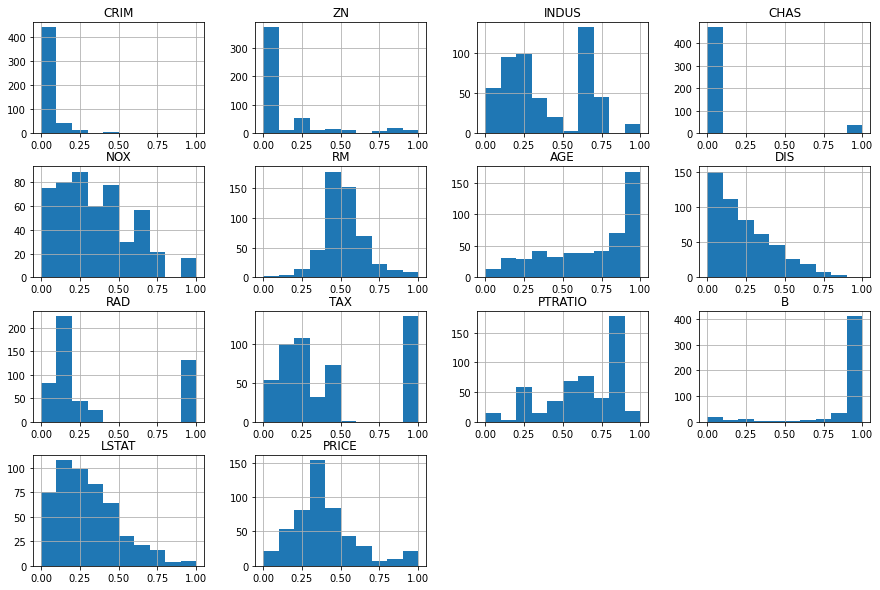

In [28]:
boston_df_scaled_minmax.hist(figsize=(15,10))
plt.show()

### Exercise 4:
Use the `MinMaxScaler` to scale the California dataset. 

In [29]:
# Load the scaler
min_max_scaler = preprocessing.MinMaxScaler()

In [30]:
# Fit and transform the data
california_df_scaled_minmax = min_max_scaler.fit_transform(california_df)

In [31]:
# Convert the data into a pandas Dataframe
california_df_scaled_minmax = pd.DataFrame(california_df_scaled_minmax, columns = california_df.columns)

In [32]:
# Get the descriptives. We round the results to 2 decimals. 
round(california_df_scaled_minmax.describe(),2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,0.40,0.54,0.03,0.02,0.04,0.00,0.33,0.48
std,0.24,0.25,0.02,0.01,0.03,0.01,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.03,0.02,0.02,0.00,0.15,0.25
50%,0.34,0.55,0.03,0.02,0.03,0.00,0.18,0.58
75%,0.51,0.71,0.04,0.02,0.05,0.00,0.55,0.63
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


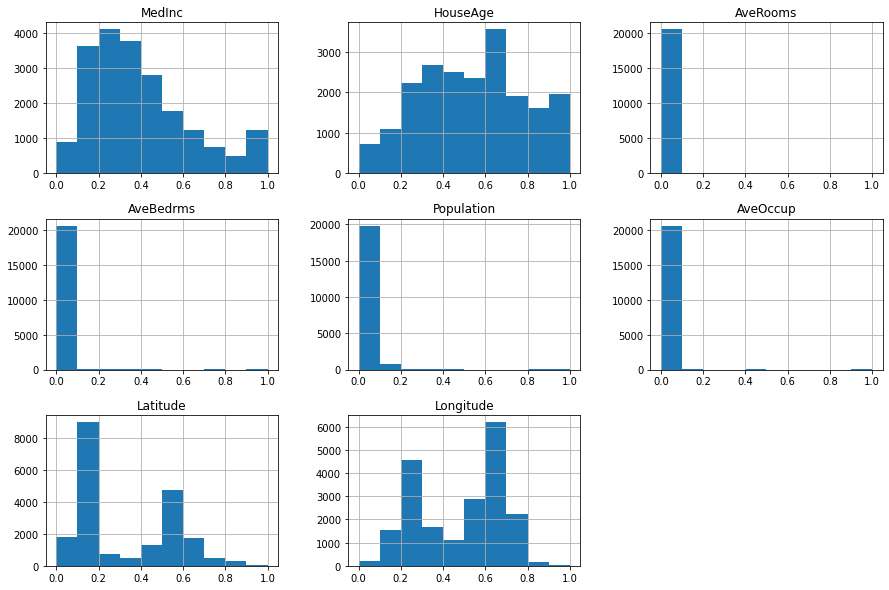

In [33]:
california_df_scaled_minmax.hist(figsize=(15,10))
plt.show()

### Summary:
* Min-max normalization method guarantees all features will have the exact same scale but does not handle outliers well. 
* This transformation rescales the dataset to another range, preserving the original scale distances and standard deviation.

## Feature selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling, reducing the amount of data collected, and, in some cases, to improve the performance of the model.

For this exercise, we will split the dataset in two parts:
* the predictive features `X`
* the target `y`

In [34]:
X_boston = boston_df.iloc[:,:-1]
y_boston = boston_df["PRICE"]

We check the data:

In [35]:
X_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


We do the same for the California datasets

In [36]:
X_california = california_df.iloc[:,1:]
y_california = california_df["MedInc"]

In [37]:
X_california

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Removing features with low variance

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.


In [38]:
# Create the selector `VarianceThreshold`
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [39]:
# Train the selector 
selector.fit(X_boston)

VarianceThreshold(threshold=0.15999999999999998)

In [40]:
# Create the dataframe with the features that explain at least 16% of the data variance
boston_df_selected_variance = X_boston[X_boston.columns[selector.get_support(indices=True)]]
boston_df_selected_variance

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### Exercise 5:
Create the selector `VarianceThreshold` with the California dataset.

In [41]:
# Create the selector
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [42]:
# Train the selector using X_california
selector.fit(X_california)

VarianceThreshold(threshold=0.15999999999999998)

In [43]:
# Create the dataframe using the california dataframe
california_df_selected_variance = X_california[X_california.columns[selector.get_support(indices=True)]]
california_df_selected_variance

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Univariate feature selection¶
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

We will check [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest), which removes all but the *k* highest scoring features.

How does this method select the *k* features? Depending on the type of problem (i.e., classification or regression), it runs F-tests to see what variables explain data's variance the most. These objects take as input a scoring function that returns univariate scores and p-values:

* For regression: `f_regression`, `mutual_info_regression`
* For classification: `chi2`, `f_classif`, `mutual_info_classif`

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

Since this dataset is usually tested with regressions, we will use the `f_regression` function to select the best *k* features in the model. This function tests the individual effect of each feature in a regression model. [More details here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)

In [44]:
# Create the SelectKBest object 
selector = SelectKBest(f_regression, k=2)

In [45]:
# Fit the model
selector.fit(X_boston, y_boston)

SelectKBest(k=2, score_func=<function f_regression at 0x124398280>)

We will see the F-scores of adding each feature to a regression model (which has `PRICE` as the target value)

In [46]:
# Check the F-scores 
selector.scores_

array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
       112.59148028, 471.84673988,  83.47745922,  33.57957033,
        85.91427767, 141.76135658, 175.10554288,  63.05422911,
       601.61787111])

And these are the p-values of these F-tests.

In [47]:
# Check the p-values
selector.pvalues_

array([1.17398708e-19, 5.71358415e-17, 4.90025998e-31, 7.39062317e-05,
       7.06504159e-24, 2.48722887e-74, 1.56998221e-18, 1.20661173e-08,
       5.46593257e-19, 5.63773363e-29, 1.60950948e-34, 1.31811273e-14,
       5.08110339e-88])

We select the features with the highest F-scores (smallest p-values). In this case, the 6th variable (RM) and the last variable (LSTAT) are the two features that explain the variance the most.

In [48]:
# Create the dataframe with the two best features
boston_df_selected_kbest = X_boston[X_boston.columns[selector.get_support(indices=True)]]
boston_df_selected_kbest

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


#### Exercise 6
Create the selector `SelectKBest` with the California dataset (`X_california`)

In [49]:
# Create the selector SelectKBest with the California data
selector = SelectKBest(f_regression, k=2).fit(X_california, y_california)

In [50]:
# Create and print the selected variables
california_df_selected_k_best = X_california[X_california.columns[selector.get_support(indices=True)]]
california_df_selected_k_best

,AveRooms,Latitude
0,6.984127,37.88
1,6.238137,37.86
2,8.288136,37.85
3,5.817352,37.85
4,6.281853,37.85
...,...,...
20635,5.045455,39.48
20636,6.114035,39.49
20637,5.205543,39.43
20638,5.329513,39.43


## Missing data

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. 

A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to **impute the missing values**, i.e., to infer them from the known part of the data. 

For this session, we will create an example where the Boston dataset will contain missing information (`NaN`)

In [51]:
# Create the dataframe with missing data. It will remove 10% of the observations
X_boston_missing_data = X_boston.mask(np.random.random(X_boston.shape) < .1)
X_boston_missing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,NaN,396.90,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,NaN,0.0,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,NaN,NaN,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,NaN,273.0,21.0,NaN,9.67
502,NaN,0.0,11.93,0.0,0.573,NaN,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,NaN,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,NaN,2.3889,1.0,273.0,21.0,393.45,6.48


In [52]:
# Check how many missing values each feature has. 
X_boston_missing_data.isna().sum()

CRIM       53
ZN         46
INDUS      57
CHAS       50
NOX        46
RM         42
AGE        58
DIS        57
RAD        60
TAX        52
PTRATIO    58
B          38
LSTAT      44
dtype: int64

We create the California dataset with missing data

In [53]:
# Create the dataframe with missing data
X_california_missing_data = X_california.mask(np.random.random(X_california.shape) < .1)
X_california_missing_data

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,6.984127,NaN,322.0,2.555556,37.88,NaN
1,NaN,6.238137,NaN,2401.0,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,52.0,5.817352,NaN,558.0,2.547945,37.85,-122.25
4,NaN,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,25.0,5.045455,1.133333,845.0,NaN,39.48,-121.09
20636,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,17.0,5.205543,1.120092,1007.0,NaN,39.43,-121.22
20638,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Univariate feature imputation
One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension.

The `SimpleImputer` class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

The strategies are:
* “mean”: replace missing values using the mean along each column. Can only be used with numeric data.
* “median”: replace missing values using the median along each column. Can only be used with numeric data.
* “most_frequent”: replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
* “constant”: replace missing values with fill_value. Can be used with strings or numeric data.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [54]:
# Create the SimpleImputer class
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [55]:
# Train and Transform the Missing data to Imputed data. 
X_boston_imputed = imp.fit_transform(X_boston_missing_data)

In [56]:
# Create the dataframe
X_boston_imputed = pd.DataFrame(X_boston_imputed, columns = X_boston.columns)
X_boston_imputed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.0,2.31,0.000000,0.538000,6.575000,65.200000,4.090000,1.00000,296.000000,18.434375,396.90000,12.776494
1,0.027310,0.0,7.07,0.000000,0.469000,6.421000,78.900000,4.967100,2.00000,242.000000,17.800000,396.90000,9.140000
2,3.764643,0.0,7.07,0.067982,0.469000,7.185000,61.100000,4.967100,2.00000,242.000000,17.800000,392.83000,4.030000
3,0.032370,0.0,2.18,0.000000,0.458000,6.998000,45.800000,6.062200,9.38565,407.229075,18.700000,394.63000,2.940000
4,0.069050,0.0,2.18,0.000000,0.458000,7.147000,54.200000,6.062200,3.00000,222.000000,18.700000,396.90000,5.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.062630,0.0,11.93,0.000000,0.573000,6.593000,69.100000,2.478600,9.38565,273.000000,21.000000,356.30985,9.670000
502,3.764643,0.0,11.93,0.000000,0.573000,6.277946,76.700000,2.287500,1.00000,273.000000,18.434375,396.90000,9.080000
503,0.060760,0.0,11.93,0.000000,0.573000,6.976000,91.000000,3.792996,1.00000,273.000000,21.000000,396.90000,5.640000
504,0.109590,0.0,11.93,0.000000,0.573000,6.794000,67.971205,2.388900,1.00000,273.000000,21.000000,393.45000,6.480000


In [57]:
# Check that the features do not have any missing data
X_boston_imputed.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Exercise 7: 
Create an imputer with the California dataset (`X_california`)

In [58]:
# Create the SimpleImputer class
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [59]:
# Train and Transform the Missing data to Imputed data. Remember to use `X_california_missing_data`
X_california_imputed = imp.fit_transform(X_california_missing_data)

In [60]:
# Create the dataframe
X_boston_imputed = pd.DataFrame(X_boston_imputed, columns = X_boston.columns)
X_boston_imputed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.0,2.31,0.000000,0.538000,6.575000,65.200000,4.090000,1.00000,296.000000,18.434375,396.90000,12.776494
1,0.027310,0.0,7.07,0.000000,0.469000,6.421000,78.900000,4.967100,2.00000,242.000000,17.800000,396.90000,9.140000
2,3.764643,0.0,7.07,0.067982,0.469000,7.185000,61.100000,4.967100,2.00000,242.000000,17.800000,392.83000,4.030000
3,0.032370,0.0,2.18,0.000000,0.458000,6.998000,45.800000,6.062200,9.38565,407.229075,18.700000,394.63000,2.940000
4,0.069050,0.0,2.18,0.000000,0.458000,7.147000,54.200000,6.062200,3.00000,222.000000,18.700000,396.90000,5.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.062630,0.0,11.93,0.000000,0.573000,6.593000,69.100000,2.478600,9.38565,273.000000,21.000000,356.30985,9.670000
502,3.764643,0.0,11.93,0.000000,0.573000,6.277946,76.700000,2.287500,1.00000,273.000000,18.434375,396.90000,9.080000
503,0.060760,0.0,11.93,0.000000,0.573000,6.976000,91.000000,3.792996,1.00000,273.000000,21.000000,396.90000,5.640000
504,0.109590,0.0,11.93,0.000000,0.573000,6.794000,67.971205,2.388900,1.00000,273.000000,21.000000,393.45000,6.480000


### Multivariate feature imputation
Multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values. Scikit-learn offers the `IterativeImputer` class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: 
* At each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. 
* Then, the regressor is used to predict the missing values of y.
* This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [61]:
# Create the IterativeImputer class
imp = IterativeImputer(max_iter=100, random_state=0)

In [62]:
# Train and Transform the Missing data to Imputed data
X_boston_imputed = imp.fit_transform(X_boston_missing_data)

In [63]:
# Create the dataframe
X_boston_imputed = pd.DataFrame(X_boston_imputed, columns = X_boston.columns)
X_boston_imputed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.000000,2.31,0.000000,0.538000,6.575000,65.20000,4.090000,1.000000,296.000000,16.712252,396.900000,9.136326
1,0.027310,0.000000,7.07,0.000000,0.469000,6.421000,78.90000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000
2,-2.981493,0.000000,7.07,0.096856,0.469000,7.185000,61.10000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000
3,0.032370,0.000000,2.18,0.000000,0.458000,6.998000,45.80000,6.062200,2.829724,223.743168,18.700000,394.630000,2.940000
4,0.069050,0.000000,2.18,0.000000,0.458000,7.147000,54.20000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.062630,0.000000,11.93,0.000000,0.573000,6.593000,69.10000,2.478600,3.122089,273.000000,21.000000,387.964931,9.670000
502,-2.062519,0.000000,11.93,0.000000,0.573000,6.479413,76.70000,2.287500,1.000000,273.000000,17.333899,396.900000,9.080000
503,0.060760,0.000000,11.93,0.000000,0.573000,6.976000,91.00000,2.944854,1.000000,273.000000,21.000000,396.900000,5.640000
504,0.109590,0.000000,11.93,0.000000,0.573000,6.794000,71.69475,2.388900,1.000000,273.000000,21.000000,393.450000,6.480000


In [64]:
# Check that there are no missing values
X_boston_imputed.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Exercise 8: 
Create an `IterativeImputer` with the California dataset (`X_california`)

In [65]:
# Create the IterativeImputer class
imp = IterativeImputer(max_iter=100, random_state=0)

In [66]:
# Train and transform the data using the imputer. Remember to use X_california_missing_data
X_california_imputed = imp.fit_transform(X_california_missing_data)

In [67]:
# Create the dataframe
X_california_imputed = pd.DataFrame(X_california_imputed, columns = X_california.columns)
X_california_imputed

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.000000,6.984127,1.375180,322.0,2.555556,37.88,-121.618748
1,27.273385,6.238137,1.185423,2401.0,2.109842,37.86,-122.220000
2,52.000000,8.288136,1.073446,496.0,2.802260,37.85,-122.240000
3,52.000000,5.817352,1.184228,558.0,2.547945,37.85,-122.250000
4,33.602434,6.281853,1.081081,565.0,2.181467,37.85,-122.250000
...,...,...,...,...,...,...,...
20635,25.000000,5.045455,1.133333,845.0,3.807197,39.48,-121.090000
20636,18.000000,6.114035,1.315789,356.0,3.122807,39.49,-121.210000
20637,17.000000,5.205543,1.120092,1007.0,2.682028,39.43,-121.220000
20638,18.000000,5.329513,1.171920,741.0,2.123209,39.43,-121.320000


### Nearest neighbors imputation

The `KNNImputer` class provides imputation for filling in missing values using the k-Nearest Neighbors approach. Each missing feature is imputed using values from `n_neighbors` nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. 
Some rules:
* When the number of available neighbors is less than `n_neighbors` and there are no defined distances to the training set, the training set average for that feature is used during imputation. 
* If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation.
* If a feature is always missing in training, it is removed during transform. 

For more information, check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)


In [68]:
# Create the KNNImputer
imp = KNNImputer(n_neighbors=3, weights="uniform")

In [69]:
# Train and Transform the Missing data to Imputed data
X_boston_imputed = imp.fit_transform(X_boston_missing_data)

In [70]:
# Create the dataframe
X_boston_imputed = pd.DataFrame(X_boston_imputed, columns = X_boston.columns)
X_boston_imputed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.0,2.31,0.0,0.538000,6.575000,65.2,4.090000,1.000000,296.000000,15.766667,396.900000,13.78
1,0.027310,0.0,7.07,0.0,0.469000,6.421000,78.9,4.967100,2.000000,242.000000,17.800000,396.900000,9.14
2,0.060627,0.0,7.07,0.0,0.469000,7.185000,61.1,4.967100,2.000000,242.000000,17.800000,392.830000,4.03
3,0.032370,0.0,2.18,0.0,0.458000,6.998000,45.8,6.062200,3.000000,233.666667,18.700000,394.630000,2.94
4,0.069050,0.0,2.18,0.0,0.458000,7.147000,54.2,6.062200,3.000000,222.000000,18.700000,396.900000,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.062630,0.0,11.93,0.0,0.573000,6.593000,69.1,2.478600,3.333333,273.000000,21.000000,393.813333,9.67
502,0.101887,0.0,11.93,0.0,0.573000,6.357667,76.7,2.287500,1.000000,273.000000,20.066667,396.900000,9.08
503,0.060760,0.0,11.93,0.0,0.573000,6.976000,91.0,3.057967,1.000000,273.000000,21.000000,396.900000,5.64
504,0.109590,0.0,11.93,0.0,0.573000,6.794000,80.3,2.388900,1.000000,273.000000,21.000000,393.450000,6.48


In [71]:
# We check that there are no NaN values
X_boston_imputed.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Exercise 9: 
Create an `KNNImputer` with the California dataset (`X_california`)

In [72]:
# Create the KNNImputer class
imp = KNNImputer(n_neighbors=3, weights="uniform")

In [73]:
# Train and transform the data using the KNNImputer. Remember to use X_california_missing_data
X_california_imputed = imp.fit_transform(X_california_missing_data)

In [74]:
# Create the dataframe
X_california_imputed = pd.DataFrame(X_california_imputed, columns = X_california.columns)
X_california_imputed

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.000000,6.984127,1.111377,322.0,2.555556,37.88,-122.443333
1,50.333333,6.238137,1.032391,2401.0,2.109842,37.86,-122.220000
2,52.000000,8.288136,1.073446,496.0,2.802260,37.85,-122.240000
3,52.000000,5.817352,1.029178,558.0,2.547945,37.85,-122.250000
4,52.000000,6.281853,1.081081,565.0,2.181467,37.85,-122.250000
...,...,...,...,...,...,...,...
20635,25.000000,5.045455,1.133333,845.0,2.705820,39.48,-121.090000
20636,18.000000,6.114035,1.315789,356.0,3.122807,39.49,-121.210000
20637,17.000000,5.205543,1.120092,1007.0,2.342214,39.43,-121.220000
20638,18.000000,5.329513,1.171920,741.0,2.123209,39.43,-121.320000
